In [1]:
#import libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats


Load DataSet

In [2]:
# importing the dataset
df = sns.load_dataset("iris")

In [3]:
#display the first 5 rows
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Data Profiling

In [4]:
# Display Data Size
print(f"The data size is: {df.shape}")

The data size is: (150, 5)


In [5]:
#Display summary Statistics and missing Value
print("===========================================")
print("Description of all features")
print(df.describe(include='all'))
print("===========================================")
print("Description of all numeric columns")
print(df.describe())
print("===========================================")
print("escription of the categorical columns")
print(df.describe(include=['object']))
print("===========================================")
print("Random 10 samples of Dataset")
print(df.sample(10))
print("===========================================")
print("Dataset information")
print(df.info())

Description of all features
        sepal_length  sepal_width  petal_length  petal_width species
count     150.000000   150.000000    150.000000   150.000000     150
unique           NaN          NaN           NaN          NaN       3
top              NaN          NaN           NaN          NaN  setosa
freq             NaN          NaN           NaN          NaN      50
mean        5.843333     3.057333      3.758000     1.199333     NaN
std         0.828066     0.435866      1.765298     0.762238     NaN
min         4.300000     2.000000      1.000000     0.100000     NaN
25%         5.100000     2.800000      1.600000     0.300000     NaN
50%         5.800000     3.000000      4.350000     1.300000     NaN
75%         6.400000     3.300000      5.100000     1.800000     NaN
max         7.900000     4.400000      6.900000     2.500000     NaN
Description of all numeric columns
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   

In [6]:
#identifying missing value
print("Missing value")
print(df.isna().sum())

Missing value
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [7]:
# identifying duplicates values of data
print("Number of duplicates values in data:")
print(df.duplicated().sum())

Number of duplicates values in data:
1


EDA

In [8]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns in the dataset:")
print(numeric_cols)

Numeric columns in the dataset:
['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


In [9]:
#correlation matrix
def correlation_matrix(df, numeric_cols):
    plt.figure(figsize=(10,8))
    sns.heatmap(df[numeric_cols].corr(),annot=True,fmt='.2f',cmap='coolwarm',square=True)
    plt.title('Correlation Matrix')
    plt.show()

In [10]:
#detecting out lier using z-score
def detect_outliers_zscore(df, numeric_cols):
    # Calculate the z-scores of the numeric columns
    z_scores = np.abs(stats.zscore(df[numeric_cols]))
    threshold = 3
    outliers = (z_scores > threshold).any(axis=1)
    return outliers

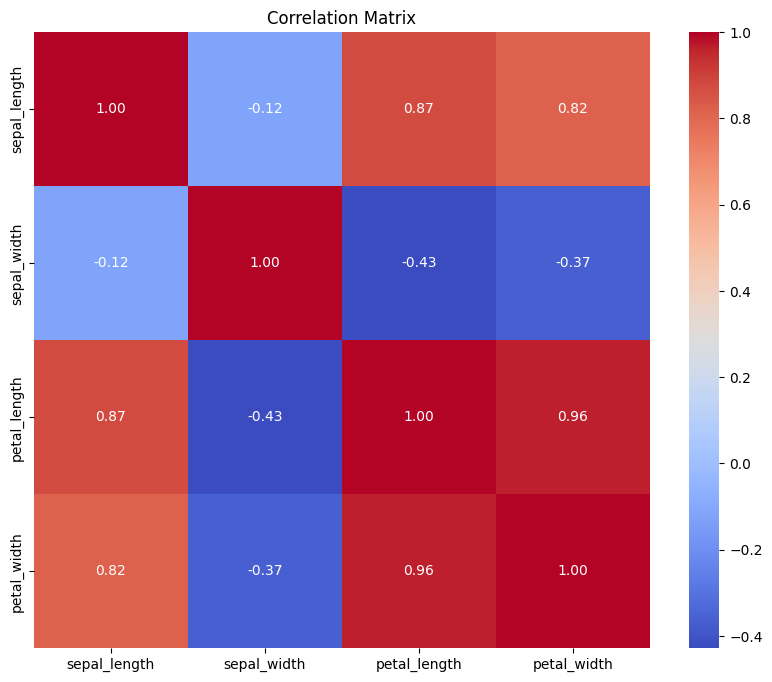

Outliers detected using Z-score method:
1


In [12]:
correlation_matrix(df, numeric_cols)
outliers = detect_outliers_zscore(df, numeric_cols)
print("Outliers detected using Z-score method:")
print(outliers.sum())

In [13]:
print(df[outliers])


    sepal_length  sepal_width  petal_length  petal_width species
15           5.7          4.4           1.5          0.4  setosa


Imputation

Outliers have been replaced with the median value of the respective column.
Number of Outliers in the dataset after replacing outliers:
0
Distribution of each numeric column (Univariate Visualizations)


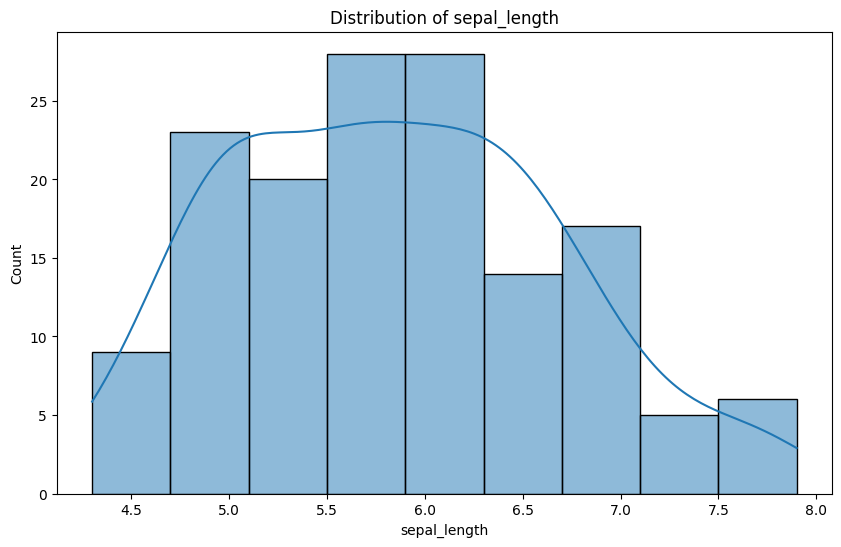

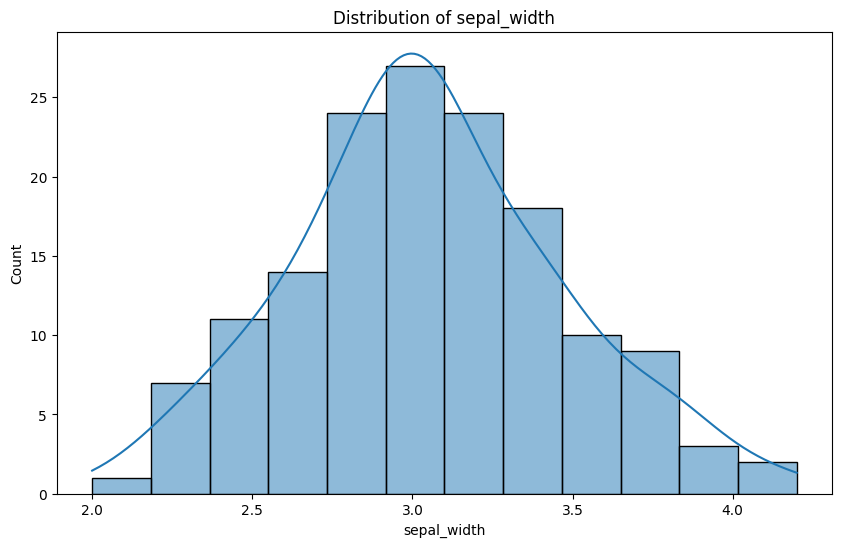

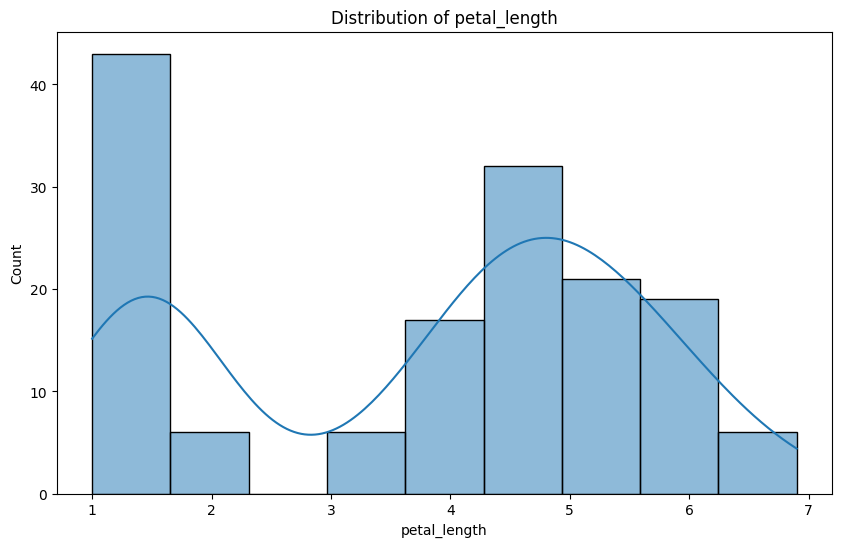

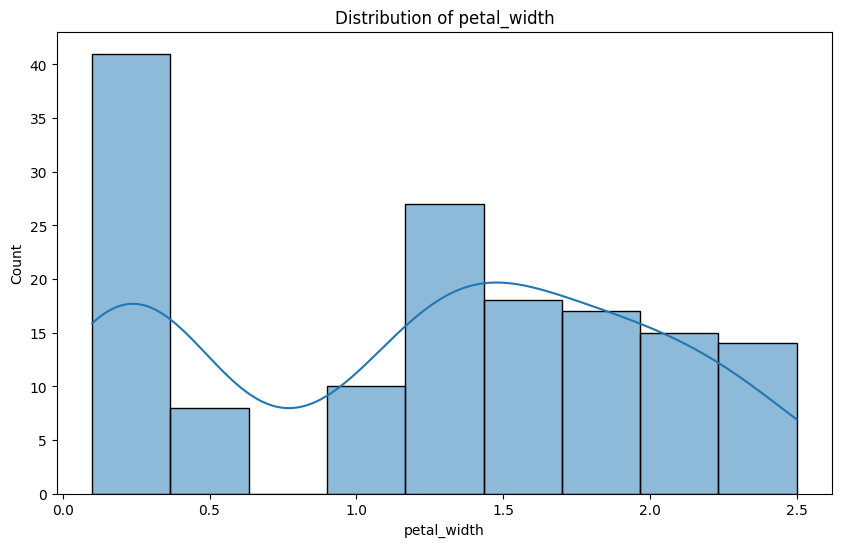

In [20]:
for col in numeric_cols:
    df.loc[outliers, col] = df[col].median()
print("Outliers have been replaced with the median value of the respective column.")
print("===========================================")
print("Number of Outliers in the dataset after replacing outliers:")
outliers = detect_outliers_zscore(df, numeric_cols)
print(outliers.sum())

print("===========================================")
# Displaying the distribution of each numeric (univariate) column
print("Distribution of each numeric column (Univariate Visualizations)")
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

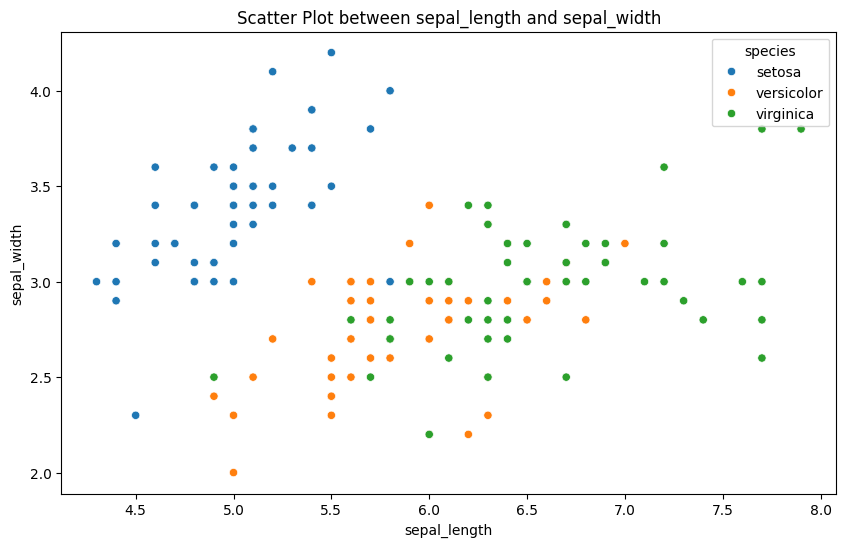

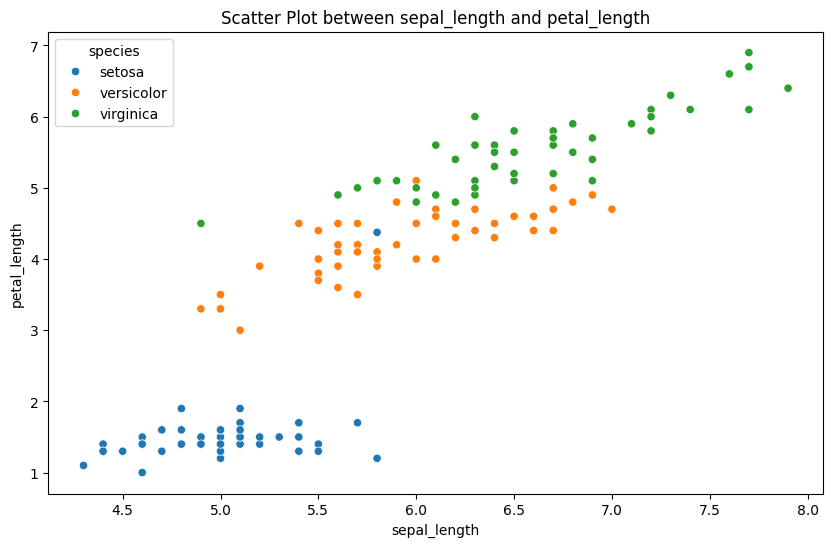

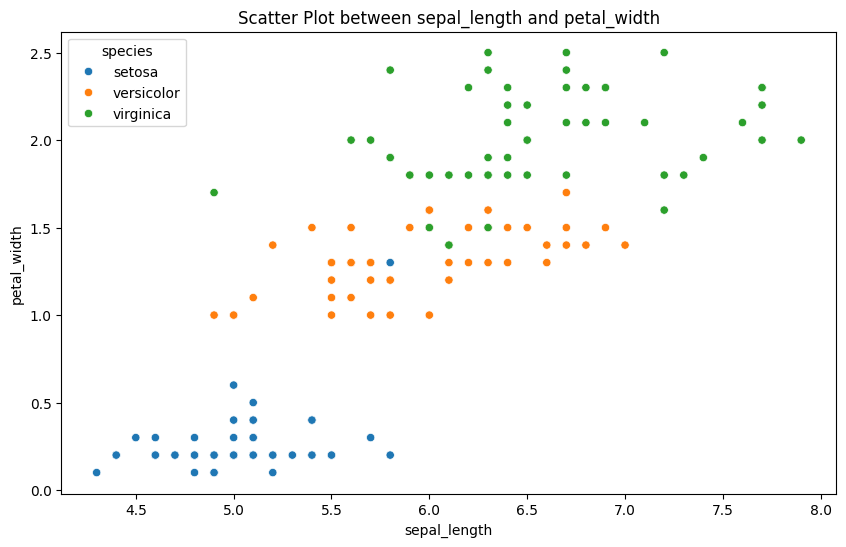

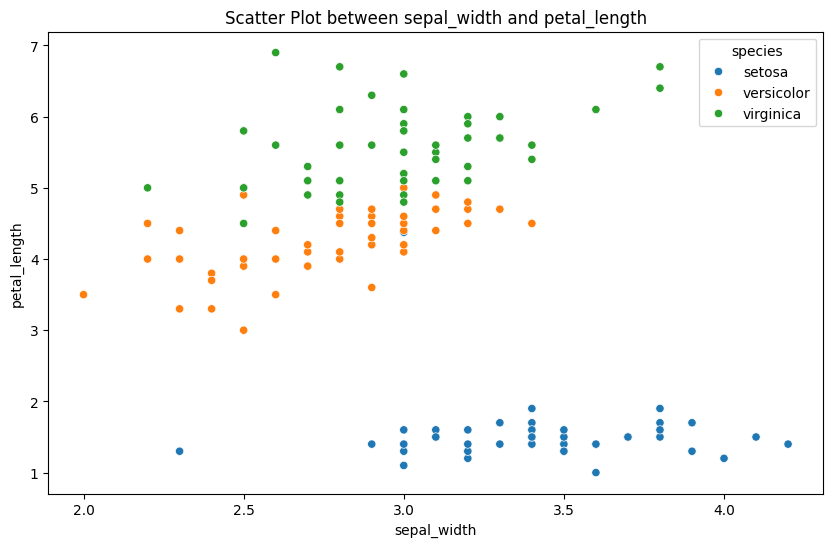

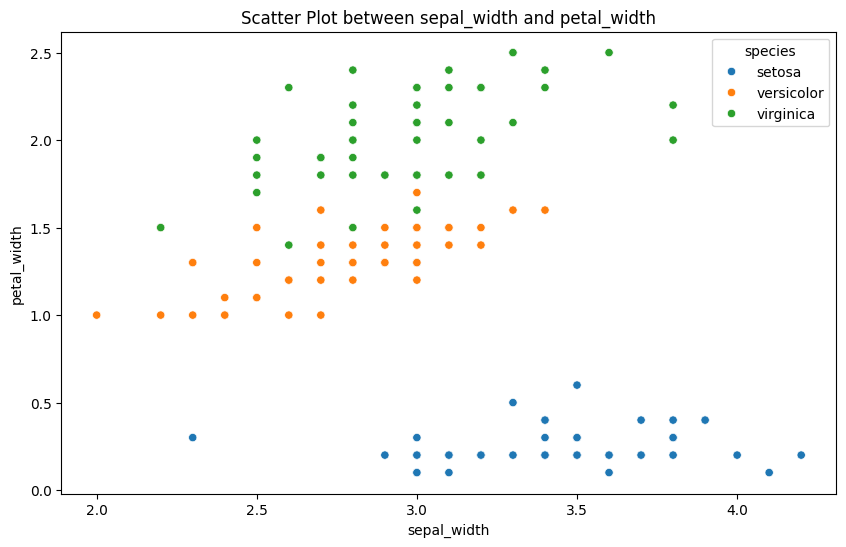

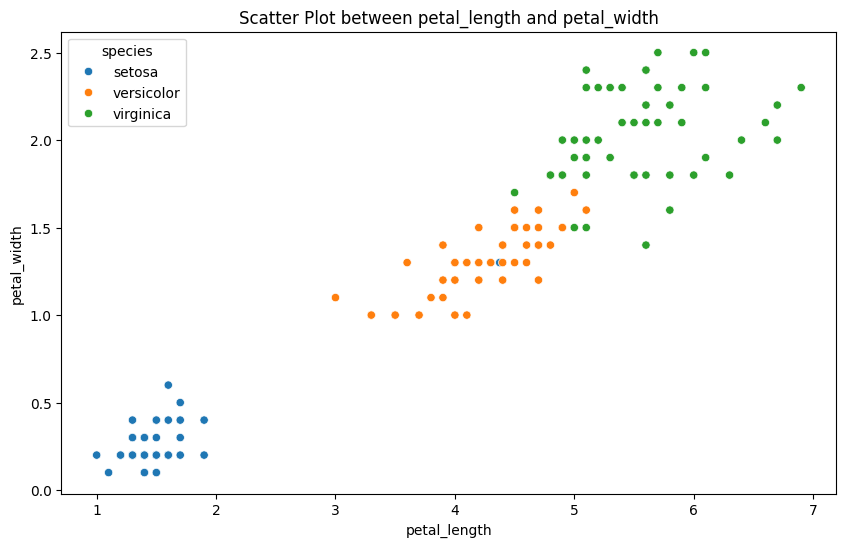

In [21]:
#Bivariate Scatter Plots
for i in range(len(numeric_cols)):
    for j in range(i+1, len(numeric_cols)):
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=df[numeric_cols[i]], y=df[numeric_cols[j]], hue=df['species'])
        plt.title(f'Scatter Plot between {numeric_cols[i]} and {numeric_cols[j]}')
        plt.show()

Multivariate Pairplot

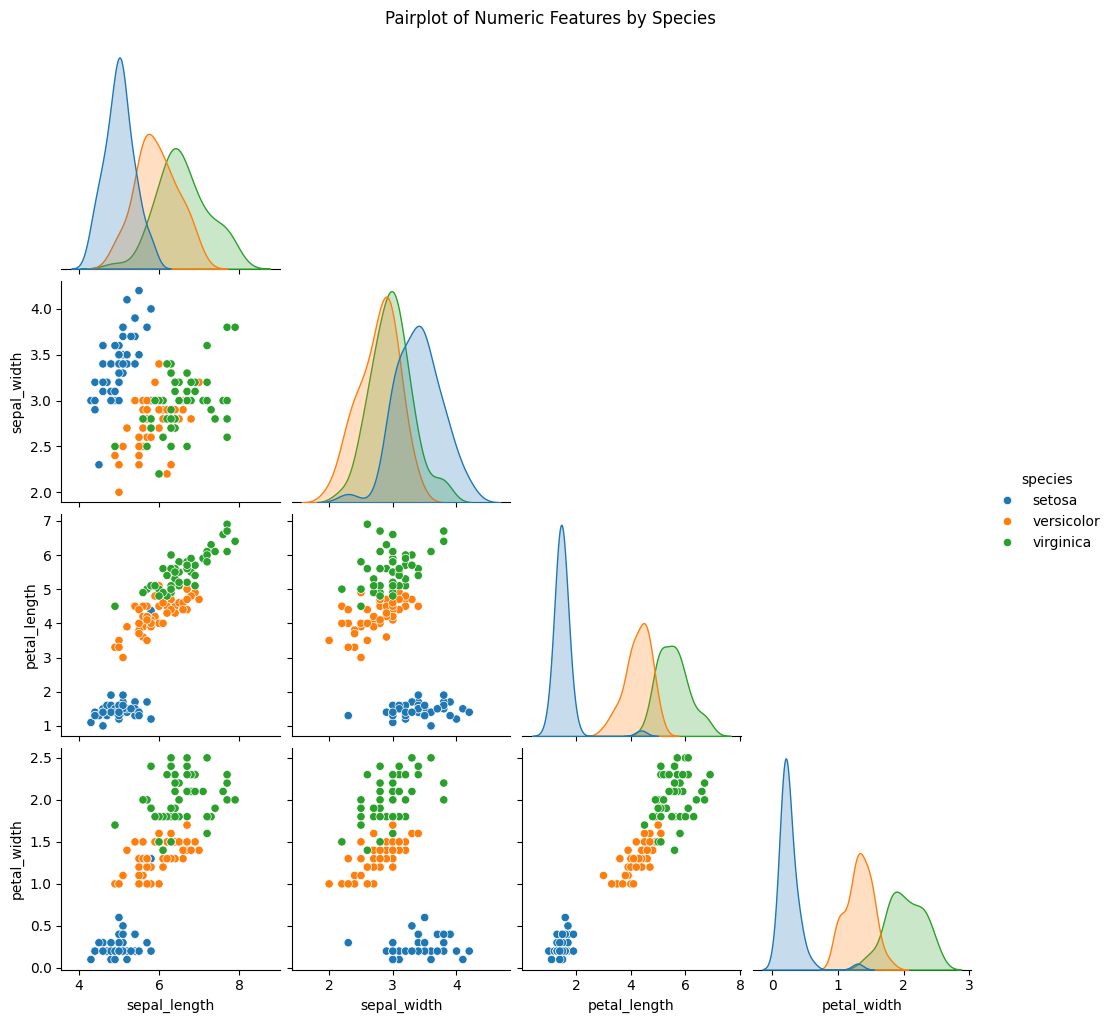

In [22]:
#Multivariate Pairplot
sns.pairplot(df, hue='species', vars=numeric_cols, corner=True)
plt.suptitle('Pairplot of Numeric Features by Species', y=1.02)
plt.show()
